In [144]:
import pandas as pd
import numpy as np

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [83]:
data = pd.read_csv("./data/cbrt_range.csv").drop_duplicates()
data

,input,initial_value,cbrt_ideal,cbrt_iter_0,cbrt_iter_1,cbrt_iter_2,cbrt_iter_3,cbrt_iter_4,cbrt_iter_5,cbrt_iter_6,...,cbrt_iter_90,cbrt_iter_91,cbrt_iter_92,cbrt_iter_93,cbrt_iter_94,cbrt_iter_95,cbrt_iter_96,cbrt_iter_97,cbrt_iter_98,cbrt_iter_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9644771172979133162736882562844771036300146760...,212664686234793823412672416320115965952,45859640165901926783327211570488934400,141776457489862548941781610880077310634,94517638326575032627854407253384873756,63011758884383355085236271502256582504,42007839256255570056824181001504388337,28005226170837046704549454001002925560,18670150780558031136366302667335283712,12446767187038687424244201778223522488,...,0,0,0,0,0,0,0,0,0,0
2,61533,78958980146504,39479292676789,55929228254904,43843212525069,39899242676514,39483697253227,39479293168120,39479292676789,39479292676789,...,0,0,0,0,0,0,0,0,0,0
3,59081,389477714194,38947771419458,129826164383728022,86550776256987109,57700517507287036,38467011677439859,25644674464935703,17096449673236012,11397633182868147,...,0,0,0,0,0,0,0,0,0,0
4,43061,35401044624551,35050539232229,35053998129346,35050539573519,35050539232229,35050539232229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,593037693171942596018894734406713542,8364277833121977665060864,840157610812680452440064,5579010779536335488802436,3725691585925609913266586,2498035612110495708493882,1697035515146631969284420,1199997311304580182925158,937276066489416835813550,849873233223947502496964,...,0,0,0,0,0,0,0,0,0,0
996,114,1616269195279,4848807585839,15623935554389,10571626245316,7387767332642,5621415347516,4950130060994,4850867369818,4848808460345,...,0,0,0,0,0,0,0,0,0,0
997,114,7273211378758,4848807585839,5567149450407,4937510223295,4850391590782,4848808103076,4848807585839,4848807585839,0,...,0,0,0,0,0,0,0,0,0,0
998,63208,398343146567,39834314656745,132781314418216243,88520876280005853,59013917522692707,39342611687844950,26228407805508711,17485605234299648,11657070225110908,...,0,0,0,0,0,0,0,0,0,0


In [167]:
data = pd.read_csv("./data/cbrt_range.csv", low_memory=False).drop_duplicates()
data["input"] = data["input"].astype(float)
data["initial_value"] = data["initial_value"].astype(float)
data["cbrt_ideal"] = data["cbrt_ideal"].astype(float)
data["cbrt_implementation"] = -1

for col in data.columns:
    if col.startswith("cbrt_iter"):
        data[col] = data[col].astype(float)
data

,input,initial_value,cbrt_ideal,cbrt_iter_0,cbrt_iter_1,cbrt_iter_2,cbrt_iter_3,cbrt_iter_4,cbrt_iter_5,cbrt_iter_6,...,cbrt_iter_91,cbrt_iter_92,cbrt_iter_93,cbrt_iter_94,cbrt_iter_95,cbrt_iter_96,cbrt_iter_97,cbrt_iter_98,cbrt_iter_99,cbrt_implementation
0,1.000000e+00,1.000000e+12,1.000000e+12,1.000000e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,1.820000e+02,5.667051e+10,5.667051e+12,1.889021e+16,1.259347e+16,8.395648e+15,5.597099e+15,3.731399e+15,2.487599e+15,1.658400e+15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,1.000000e+00,1.000000e+10,1.000000e+12,3.333340e+15,2.222227e+15,1.481484e+15,9.876563e+14,6.584375e+14,4.389584e+14,2.926389e+14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,5.100000e+01,3.337587e+13,3.708430e+12,2.226584e+13,1.487818e+13,9.995587e+12,6.833875e+12,4.919928e+12,3.982266e+12,3.726828e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.489200e+04,4.058683e+13,4.018498e+13,4.018894e+13,4.018498e+13,4.018498e+13,4.018498e+13,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
99996,6.489200e+04,6.027746e+13,4.018498e+13,4.613831e+13,4.092011e+13,4.019810e+13,4.018498e+13,4.018498e+13,4.018498e+13,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
99997,1.070000e+02,1.773715e+13,4.747459e+12,1.193813e+13,8.209015e+12,6.001951e+12,4.991397e+12,4.759187e+12,4.747488e+12,4.747459e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
99998,6.510300e+04,4.425133e+13,4.022848e+13,4.058312e+13,4.023157e+13,4.022848e+13,4.022848e+13,4.022848e+13,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


Parse data to get: niter, final converged solution, and the difference between ideal cbrt and implementation cbrt (that we're analysing):

In [168]:
num_rows_to_analyse = 100

In [169]:
subset_data = data[:num_rows_to_analyse].reset_index(drop=True).reindex()

d = subset_data.mask(subset_data == 0).drop(['input', 'initial_value', 'cbrt_ideal', 'cbrt_implementation'], axis=1)
converged_solution = np.empty((subset_data.shape[0],))
niter = np.empty((subset_data.shape[0],))
for idx, row in subset_data.iterrows():
    
    # we ignore input == 0, since it is simpler:
    if row.input == 0:
        continue
    
    iter_data = row.mask(row == 0).drop(['input', 'initial_value', 'cbrt_ideal', 'cbrt_implementation']).dropna().to_list()
    convergence_iter = int(row.mask(row == 0).drop(['input', 'initial_value', 'cbrt_ideal', 'cbrt_implementation']).dropna().index.to_list()[-1].split("_")[-1])
    converged_solution[idx] = iter_data[-1]
    niter[idx] = convergence_iter + 1  # add 1 since niter == 0 is the first iteration
     
subset_data["cbrt_implementation"] = converged_solution
subset_data["niter"] = niter.astype(int)
subset_data["ideal_minus_implemetation"] = subset_data.apply(
    lambda x: x["cbrt_ideal"] - x["cbrt_implementation"] if x["cbrt_implementation"] > -1 else -9999, 
    axis=1
)
subset_data

,input,initial_value,cbrt_ideal,cbrt_iter_0,cbrt_iter_1,cbrt_iter_2,cbrt_iter_3,cbrt_iter_4,cbrt_iter_5,cbrt_iter_6,...,cbrt_iter_93,cbrt_iter_94,cbrt_iter_95,cbrt_iter_96,cbrt_iter_97,cbrt_iter_98,cbrt_iter_99,cbrt_implementation,niter,ideal_minus_implemetation
0,1.0,1.000000e+12,1.000000e+12,1.000000e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+12,1,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.828741e-314,0,-2.828741e-314
2,182.0,5.667051e+10,5.667051e+12,1.889021e+16,1.259347e+16,8.395648e+15,5.597099e+15,3.731399e+15,2.487599e+15,1.658400e+15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.667051e+12,26,0.000000e+00
3,1.0,1.000000e+10,1.000000e+12,3.333340e+15,2.222227e+15,1.481484e+15,9.876563e+14,6.584375e+14,4.389584e+14,2.926389e+14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+12,26,0.000000e+00
4,51.0,3.337587e+13,3.708430e+12,2.226584e+13,1.487818e+13,9.995587e+12,6.833875e+12,4.919928e+12,3.982266e+12,3.726828e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.708430e+12,11,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,43271.0,6.036544e+13,3.510743e+13,4.420184e+13,3.685025e+13,3.518855e+13,3.510761e+13,3.510743e+13,3.510743e+13,3.510743e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.510743e+13,7,0.000000e+00
96,43271.0,4.973197e+11,3.510743e+13,5.831857e+16,3.887905e+16,2.591936e+16,1.727958e+16,1.151972e+16,7.679812e+15,5.119875e+15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.510743e+13,25,0.000000e+00
97,43271.0,1.151657e+14,3.510743e+13,7.786465e+13,5.428877e+13,4.108642e+13,3.593530e+13,3.512635e+13,3.510744e+13,3.510743e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.510743e+13,8,0.000000e+00
98,28676.0,5.815581e+13,3.060832e+13,4.159679e+13,3.325550e+13,3.081345e+13,3.060968e+13,3.060832e+13,3.060832e+13,3.060832e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.060832e+13,7,0.000000e+00


Plot an example of a convergence:

In [197]:
def plot_iterations(row_number: int):

    to_plot = subset_data.loc[row_number]

    cbrt_iter = to_plot.mask(to_plot == 0).drop(['input', 'initial_value', 'cbrt_ideal', 'cbrt_implementation', 'niter', 'ideal_minus_implemetation']).dropna()
    cbrt_niter = [int(i.split("_")[-1]) for i in cbrt_iter.index.to_list()]

    fig, ax = plt.subplots(1,1, figsize=(20, 8))

    ax.plot(
        cbrt_niter,
        cbrt_iter,
        '.',
        color="black",
    )

    ax.set_xlabel("n_iter [n]", fontsize=20)
    ax.set_ylabel("cube_root[n]", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.set_yscale('log')
    ax.set_title(
        f"cbrt({to_plot.input}), initial_value={to_plot.initial_value}\n"
        f"final_soln={to_plot.cbrt_implementation}, ideal_soln={to_plot.cbrt_ideal}", 
        fontsize=20
    );


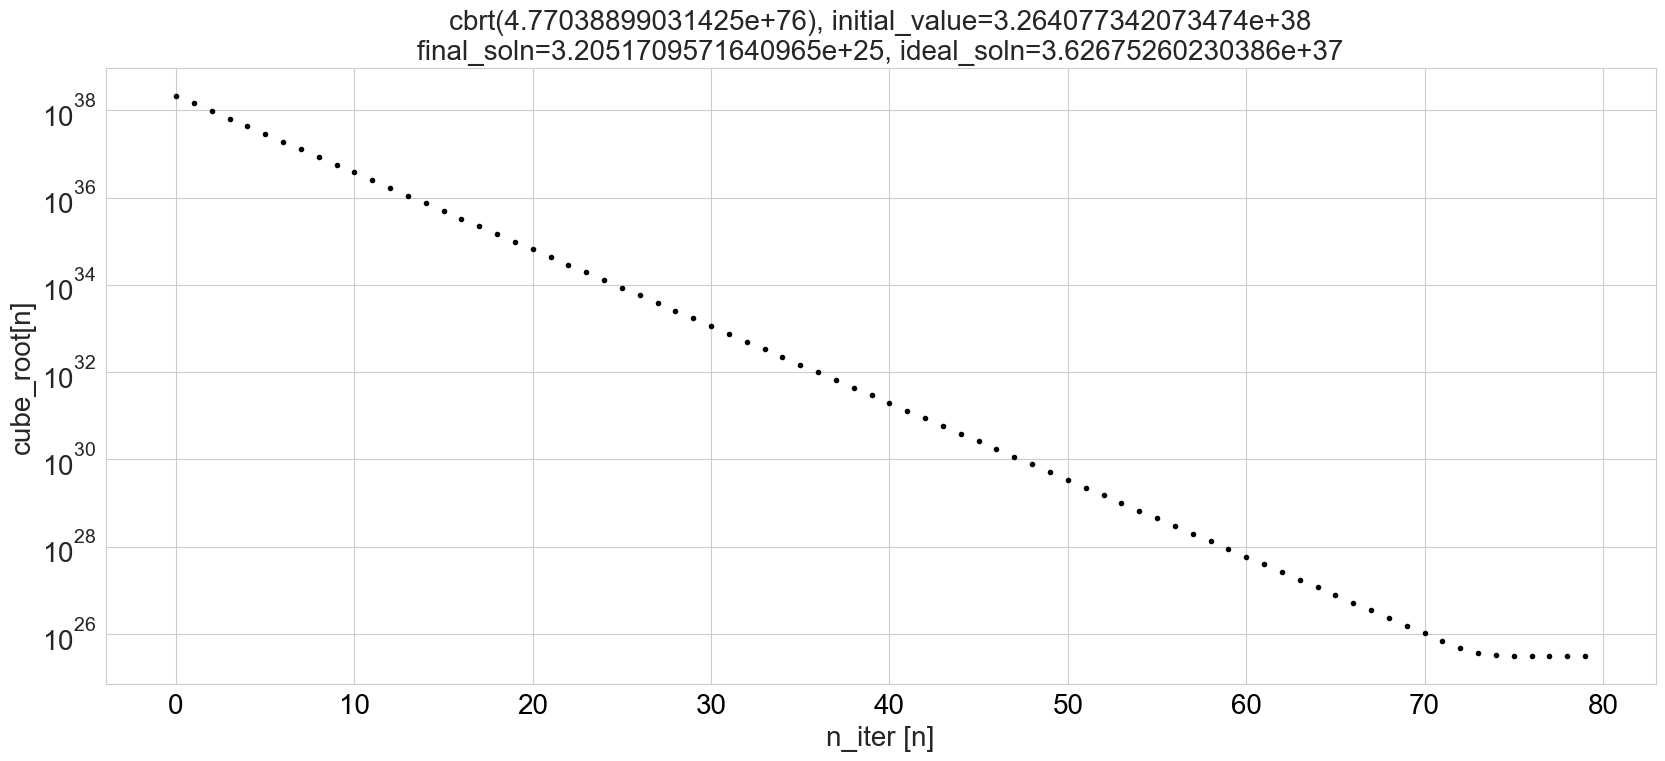

In [198]:
plot_iterations(subset_data.niter.idxmax())

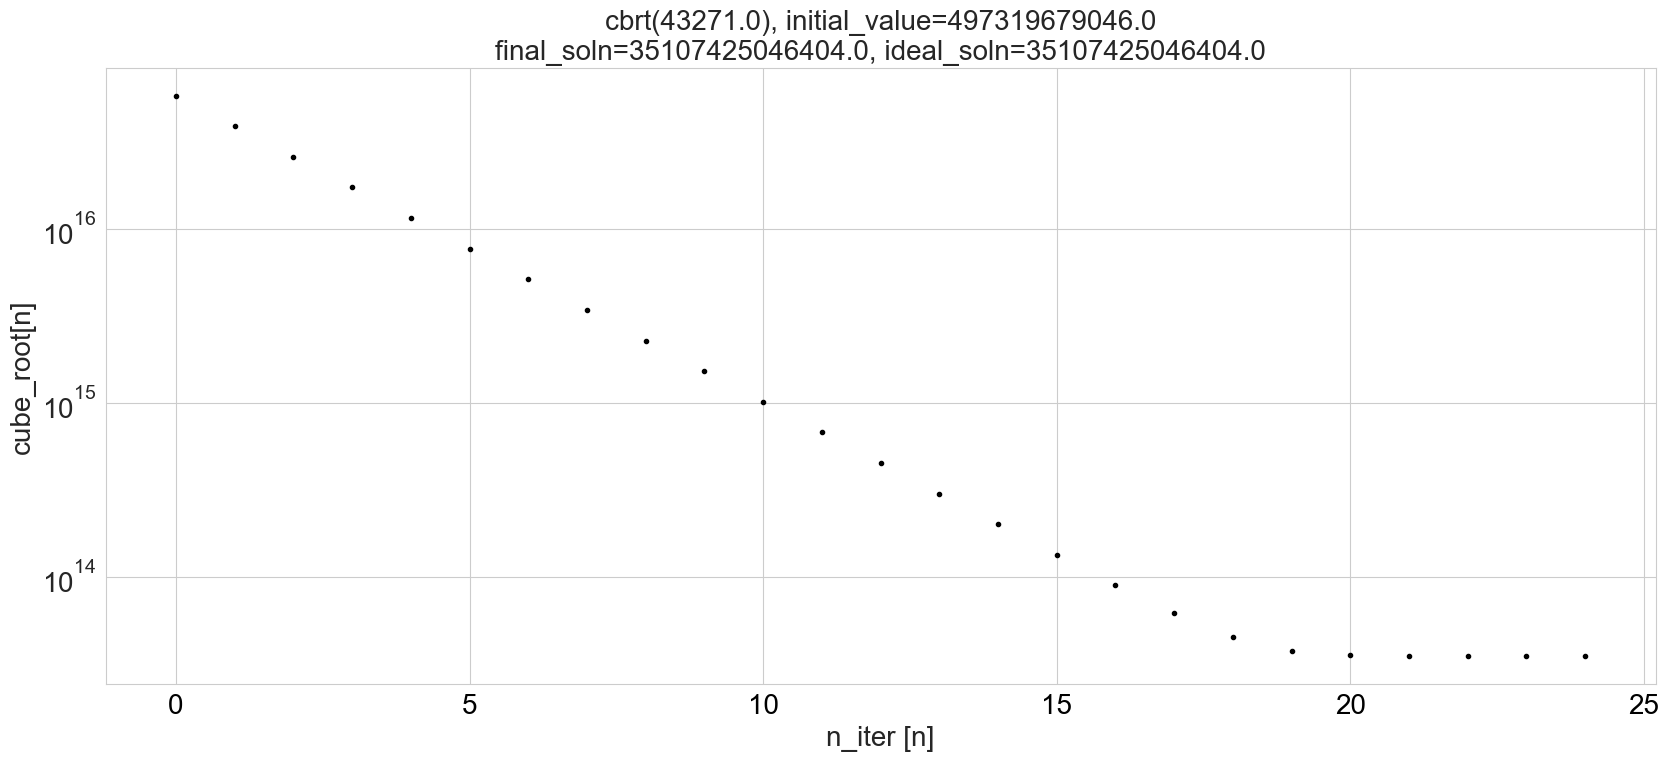

In [199]:
plot_iterations(96)